# Fyzická kondice


In [20]:
import pandas
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    accuracy_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from six import StringIO
from IPython.display import Image
import pydotplus
from pydotplus import graph_from_dot_data
from sklearn.preprocessing import StandardScaler
import numpy

# import os
# os.environ["PATH"] += os.pathsep + r'C:\Program Files\Graphviz\bin'


Stáhni si data ze souboru [bodyPerformance.csv](bodyPerformance.csv) o fyzické kondici, která byla jihokorejskou organizací Korea Sports Promotion Foundation. Data obsahují různé vstupní hodnoty a výstupní hodnotu, kterou je zařazení jedince do jedné ze čtyř výkonnostních tříd.

- `age` = věk (20 až 64 let),
- `gender` = pohlaví (F, M),
- `height_cm` = výška v cm,
- `weight_kg` = hmotnost v kg,
- `body_fat_%` = tělesný tuk v procentech,
- `distolic` = diastolický krevní tlak (min),
- `systolic` = systolický krevní tlak (min),
- `gripForce` = síla stisku,
- `sit and bend forward_cm` = sed a předklon v cm,
- `sit-ups counts` = počty sedů-lehů,
- `broad jump_cm` = skok do dálky v cm,
- `class`  = třída fyzické výkonnosti (4 třídy, A je nejlepší a D nejhorší).


In [21]:
data = pandas.read_csv("bodyPerformance.csv")
data.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B



Uvažuj, že chceš přijímat lidi do organizace, která vyžaduje vysokou fyzickou výkonnost. 

Tvou snahou je zkrátit a zefektivnit přijímací proces. 

Zkus tedy zjistit, nakolik přesné je zařazení jedinců do výkonnostních tříd bez nutnosti měření jejich výkoknu při vykonání jednotlivých cviků. 

Využij tedy všechny vstupní proměnné s výjimkou `sit and bend forward_cm`, `sit-ups counts` a `broad jump_cm`.

- K rozřazení jedinců do skupin využij rozhodovací strom a jeden ze zbývajících dvou algoritmů probíraných na lekcích (tj. K Nearest Neighbours nebo Support Vector Machine). Rozhodovacímu stromu omez maximální počet pater na 5 a poté si zobraz graficky a vlož ho do Jupyter notebooku nebo jako obrázek ve formátu PNG jako součást řešení.
- Vytvoř matici záměn pro rozhodovací strom. Kolik jedinců s nejvyšší fyzickou výkonností (tj. ze skupiny A) bylo klasifikování správně? Kolik pak bylo zařazeno do skupin B, C a D? Uveď výsledky do komentáře v programu nebo do buňky v Jupyter notebooku.
- Urči metriku `accuracy` pro rozhodovací strom a pro jeden ze dvou vybraných algoritmů. Který algoritmus si vedl lépe? Odpověď napiš do komentáře.
- Nyní uvažuj, že se rozhodneš testovat jedince pomocí jednoho ze cviků. Vyber cvik, který dle tebe nejvíce vypovídá o fyzické výkonnosti jedince. Porovnej, o kolik se zvýšila hodnota metriky `accuracy` pro oba algoritmy.

Sloupec `gender` v našem datasetu vyžadují použítí `OneHotEncoder`, protože jde o kategoriální proměnné. 

Ostatní data je lepší nechat v původní hodnotě (protože budeme zatím pracovat s rozhodovacím stromem).

Níže je postup, jak nakombinovat informaci o pohlaví s číselnými sloupci. Postup vychází z postupu v lekcích. Podívej se na jednotlivé řádky a zkus vymyslet, jaký je jejich smysl.

In [22]:
categorical_columns = ["gender"]
numeric_columns = [
    "age",
    "height_cm",
    "weight_kg",
    "body fat_%",
    "diastolic",
    "systolic",
    "gripForce",
]
numeric_data = data[numeric_columns].to_numpy()

In [23]:
# Níže je kód, pomocí kterého můžeš využít `StandardScaler()` pro numerické sloupce a `OneHotEncoder()` pro sloupec s pohlavím.
encoder = OneHotEncoder()
encoded_columns = encoder.fit_transform(data[categorical_columns])
encoded_columns = encoded_columns.toarray()

scaler = StandardScaler()
numeric_data = scaler.fit_transform(data[numeric_columns])

In [24]:
y = data["class"]
X = numpy.concatenate([encoded_columns, numeric_data], axis=1)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

clf = DecisionTreeClassifier(random_state=42, max_depth=5)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

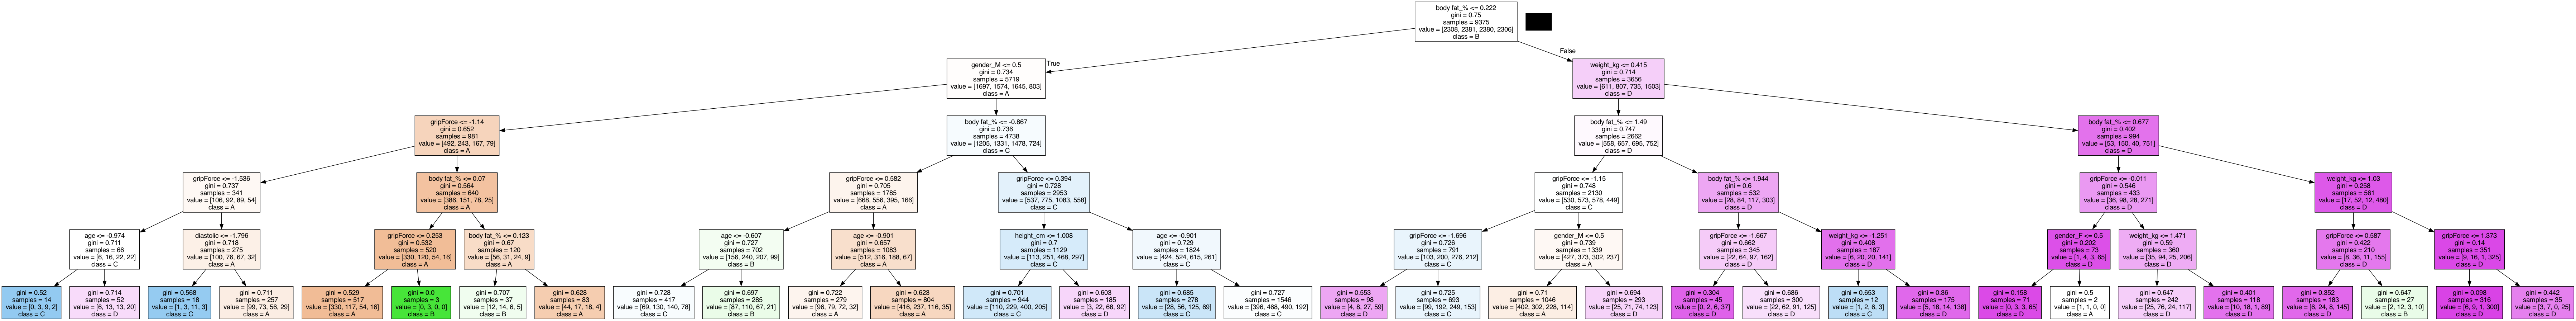

In [26]:
dot_data = StringIO()
export_graphviz(
    clf,
    out_file=dot_data,
    filled=True,
    feature_names=list(encoder.get_feature_names_out()) + numeric_columns,
    class_names=["A", "B", "C", "D"],
)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

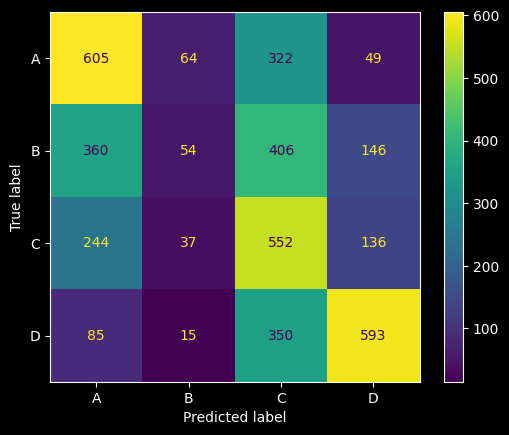

In [27]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)

In [28]:
# Hodnota metriky `accuracy` je 44.89 %.
accuracy_score(y_test, y_pred)

0.4489795918367347

Pokud použiješ algoritmus K Nearest Neighbours, vyjde ti `accuracy` cca 41.04 %.

In [29]:
clf = KNeighborsClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.41040318566450973